In [6]:
import networkx as nx
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import community

In [2]:
with open('../scraper/my_graph.pkl', 'rb') as f:
    G = pickle.load(f)

In [3]:
print(len(G.nodes))
print(len(G.edges))

41368
231090


Graph Information:
Number of nodes: 41368
Number of edges: 231090

Graph Properties:
Is directed: True
Is strongly connected: False
Is weakly connected: False
Density: 0.00013504005354956084


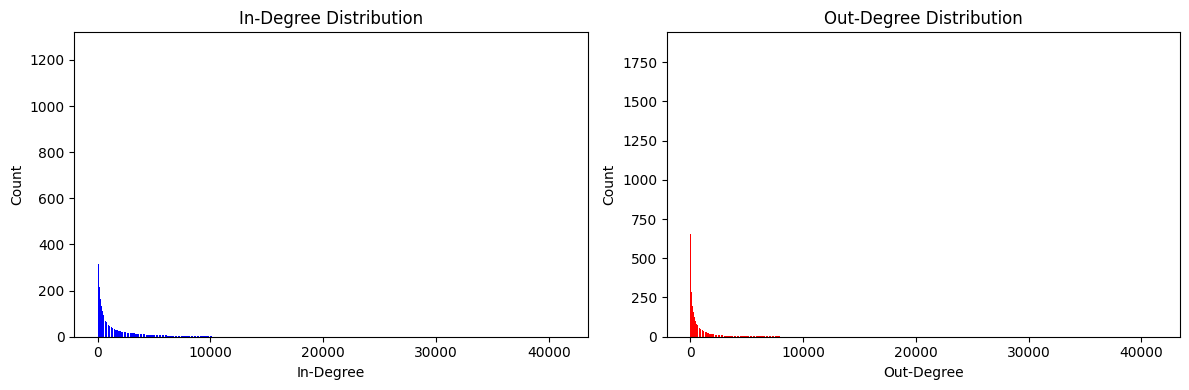


Centrality Measures:


KeyboardInterrupt: 

In [4]:
def directed_graph_analysis(graph):
    # Basic information about the graph
    print("Graph Information:")
    print("Number of nodes:", nx.number_of_nodes(graph))
    print("Number of edges:", nx.number_of_edges(graph))
    # print("Nodes:", list(graph.nodes()))
    # print("Edges:", list(graph.edges()))

    # Basic graph properties
    print("\nGraph Properties:")
    print("Is directed:", nx.is_directed(graph))
    print("Is strongly connected:", nx.is_strongly_connected(graph))
    print("Is weakly connected:", nx.is_weakly_connected(graph))
    print("Density:", nx.density(graph))

    # In-degree and out-degree distribution
    in_degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)
    out_degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(in_degree_sequence)), in_degree_sequence, width=0.8, color="blue")
    plt.title("In-Degree Distribution")
    plt.xlabel("In-Degree")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.bar(range(len(out_degree_sequence)), out_degree_sequence, width=0.8, color="red")
    plt.title("Out-Degree Distribution")
    plt.xlabel("Out-Degree")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

    # Clustering coefficient (only defined for undirected graphs, so skip in directed case)
    if not nx.is_directed(graph):
        print("\nClustering Coefficient:")
        print("Average Clustering Coefficient:", nx.average_clustering(graph))

    # # Shortest path analysis
    # print("\nShortest Path Analysis:")
    # try:
    #     shortest_path = nx.shortest_path(graph)
    #     print("Shortest Path:", shortest_path)
    # except nx.NetworkXNoPath:
    #     print("No path exists between some nodes.")

    # Centrality measures
    print("\nCentrality Measures:")
    in_degree_centrality = nx.in_degree_centrality(graph)
    out_degree_centrality = nx.out_degree_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 2, 1)
    plt.bar(range(len(in_degree_centrality)), in_degree_centrality, width=0.8, color="blue")
    plt.title("In-Degree Centrality")
    plt.xlabel("Centrality")
    plt.ylabel("Count")

    plt.subplot(2, 2, 2)
    plt.bar(range(len(out_degree_centrality)), out_degree_centrality, width=0.8, color="blue")
    plt.title("Out-Degree Centrality")
    plt.xlabel("Centrality")
    plt.ylabel("Count")
    
    plt.subplot(2, 2, 3)
    plt.bar(range(len(closeness_centrality)), closeness_centrality, width=0.8, color="green")
    plt.title("Closeness Centrality")
    plt.xlabel("Centrality")
    plt.ylabel("Count")
    
    plt.subplot(2, 2, 4)
    plt.bar(range(len(betweenness_centrality)), betweenness_centrality, width=0.8, color="black")
    plt.title("Betweenness Centrality")
    plt.xlabel("Centrality")
    plt.ylabel("Count")

def plot_graph(graph):
    progress_bar = tqdm(total=len(graph.nodes), desc="Drawing nodes", unit=" node")
    def update_progress_bar(_):
        progress_bar.update(1)

    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', animation_delay=0.2, progress_callback=update_progress_bar)
    progress_bar.close()

    # Visualize the graph
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.title("Graph Visualization")
    plt.show()
    
#plot graph
# plot_graph(G)

# Analyze the graph
directed_graph_analysis(G)

In [9]:
def louvain_partition(graph):
    # Use the Louvain algorithm to find communities
    partition = community.best_partition(graph)

    # Print the modularity score
    modularity = community.modularity(partition, graph)
    print("Modularity:", modularity)

    return partition

partition = louvain_partition(nx.Graph(G))

Modularity: 0.3477327217139655


In [12]:
max(partition.values())

637